In [2]:
# from pretrained model instructions at https://keras-ocr.readthedocs.io/en/latest/examples/using_pretrained_models.html
import matplotlib.pyplot as plt

# Need to install using
# pip3 install keras-ocr
import keras_ocr

# Also need to install tensorflow -- it does not appear to be installed as a dependency of keras_ocr
# pip3 install tensorflow
# To test:
# python3 -c 'import tensorflow;print(tensorflow.__version__)'

# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

print('done')

Looking for /Users/baskausj/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/baskausj/.keras-ocr/crnn_kurapan.h5
done


In [4]:
# Get a set of three example images
images = [
    keras_ocr.tools.read(url) for url in [
        'https://upload.wikimedia.org/wikipedia/commons/b/bd/Army_Reserves_Recruitment_Banner_MOD_45156284.jpg',
        #'https://upload.wikimedia.org/wikipedia/commons/e/e8/FseeG2QeLXo.jpg', # bad URL
        'https://upload.wikimedia.org/wikipedia/commons/b/b4/EUBanana-500x112.jpg'
    ]
]


In [23]:
# alternative to use local image in working directory
images = [
    keras_ocr.tools.read(url) for url in [
        '2001.101.tif',
        '2001.112.tif'
    ]
]


In [24]:
# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)
print(prediction_groups)

[[('fair', array([[1524.4524 ,  287.01474],
       [2940.2156 ,  263.99417],
       [2946.8708 ,  673.29016],
       [1531.1078 ,  696.3107 ]], dtype=float32)), ('fan', array([[ 123.95215,  293.8125 ],
       [1547.1064 ,  293.8125 ],
       [1547.1064 ,  679.4414 ],
       [ 123.95215,  679.4414 ]], dtype=float32)), ('lgge', array([[ 231.85156,  694.9211 ],
       [2731.734  ,  759.02057],
       [2715.47   , 1393.314  ],
       [ 215.58754, 1329.2144 ]], dtype=float32)), ('thie', array([[ 987.02637, 1395.6094 ],
       [2056.6875 , 1395.6094 ],
       [2056.6875 , 1772.0566 ],
       [ 987.02637, 1772.0566 ]], dtype=float32)), ('mai', array([[ 195.61234 , 1722.6211  ],
       [1327.922   , 1920.7753  ],
       [1208.1292  , 2605.3057  ],
       [  75.819496, 2407.1516  ]], dtype=float32)), ('erick', array([[1208.1398, 1859.6133],
       [2750.6252, 1911.0295],
       [2727.457 , 2606.0723],
       [1184.9716, 2554.6562]], dtype=float32)), ('', array([[2717.7656, 2010.7793],
       [2

In [25]:
image = 0
for word in prediction_groups[image]:
    print(word[0])

fair
fan
lgge
thie
mai
erick

junelaiz
tenn
nashville
rton
hatch
show
print
syn


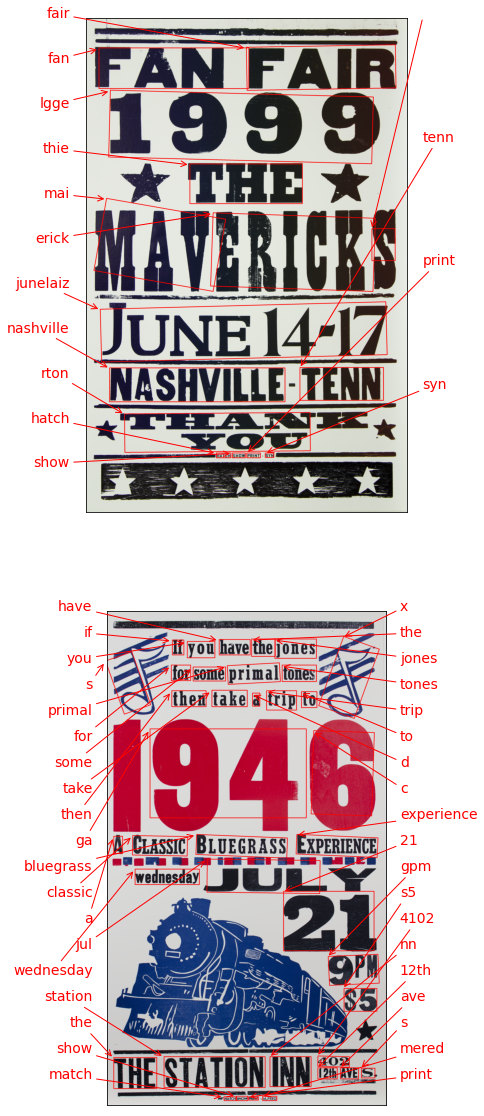

In [26]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)
